In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

### **Problem statement - Loan prediction**

### **Step 1 : Data Gathering**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Finance.csv")

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**DROPING OF COLUMNS**

In [ ]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Check the current columns
print(df.columns)

columns_to_drop = [
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Gender'

]

df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')


In [ ]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,7583,0.0,187.0,360.0,1.0,Y


### **Step 2:EDA - Read and explore the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
 6   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.7+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isna().sum()*100/len(df)

,0
Loan_ID,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Credit_History,8.143322
Loan_Status,0.000000


### **Step 3: Missing value imputation**

**1.Gender**

In [ ]:
#sns.countplot(x = df['Gender'])

In [ ]:
#df['Gender'].mode()[0]

In [ ]:
#df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

**2.Married**

In [ ]:
#sns.countplot(x= df['Married'])

In [ ]:
#df['Married'].mode()[0]

In [ ]:
#df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

**3.Dependents**

In [ ]:
#sns.countplot(x=df['Dependents'])

In [ ]:
#df['Dependents'].value_counts()

In [ ]:
#df['Dependents'].mode()[0]

In [ ]:
#df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

**4.Self_Employed**

In [ ]:
#sns.countplot(x = df['Self_Employed'])

In [ ]:
#df['Self_Employed'].mode()[0]

In [ ]:
#df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isna().sum()*100/len(df)

,0
Loan_ID,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Credit_History,8.143322
Loan_Status,0.000000


**5.LoanAmount**

In [ ]:
df['LoanAmount'].median()

128.0

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

**6.Loan_Amount_Term**

In [ ]:
df['Loan_Amount_Term'].median()

360.0

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

**7.Credit_History**

<Axes: xlabel='Credit_History', ylabel='count'>

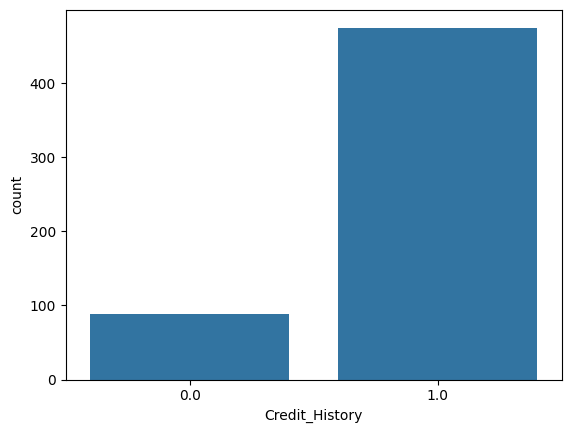

In [ ]:
sns.countplot(x = df['Credit_History'])

In [ ]:
df['Credit_History'].mode()[0]

1.0

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isna().sum()

,0
Loan_ID,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_Status,0


**Step 4 : Feature creation**

In [ ]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,5849,0.0,128.0,360.0,1.0,Y
1,LP001003,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,6000,0.0,141.0,360.0,1.0,Y


In [ ]:
df.replace({
    "Loan_Status": {'N': 0, 'Y': 1}
}, inplace=True)

In [ ]:
#df.replace({
   # "Loan_Status": {'N': 0, 'Y': 1},
    #"Gender": {'Male': 0, 'Female': 1},
    #"Education": {'Not Graduate': 0, 'Graduate': 1},
   # "Married": {'No': 0, 'Yes': 1},
   # "Self_Employed": {'No': 0, 'Yes': 1}
#}, inplace=True)

In [ ]:
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,5849,0.0,128.0,360.0,1.0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,1
610,LP002979,4106,0.0,40.0,180.0,1.0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1


**Step 5 : Train Test split the data**

In [ ]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
    #x = pd.get_dummies(data = x, columns = ["Property_Area","Dependents"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [ ]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


**Step 6: Fit and evaluate model**

In [ ]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split= 0.01,\
                                            max_features= 0.8,
                                            max_samples= 0.8,
                                            n_estimators: 200)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model, random_forest_predict

SyntaxError: positional argument follows keyword argument (<ipython-input-219-ae532d6b6dfe>, line 7)

In [ ]:
model, rf_predict = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[14 19]
 [ 3 87]]


Accuracy of Random Forest: 82.11382113821138 

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 0.8],
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest = RandomForestClassifier(
        random_state=0,
        max_depth=5,
        min_samples_split=0.01,
        max_features=0.8,
        max_samples=0.8,
        n_estimators=200  # Corrected this line
    )

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)

    print("Confusion Matrix:")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:", random_forest_acc_score * 100, '\n')
    print(classification_report(y_test, random_forest_predict))

    return model, random_forest_predict

# Example usage
# model, rf_predict = fit_and_evaluate_model(x_train, x_test, y_train, y_test)


**CONFUSION MATRIX OF RANDOM FOREST**

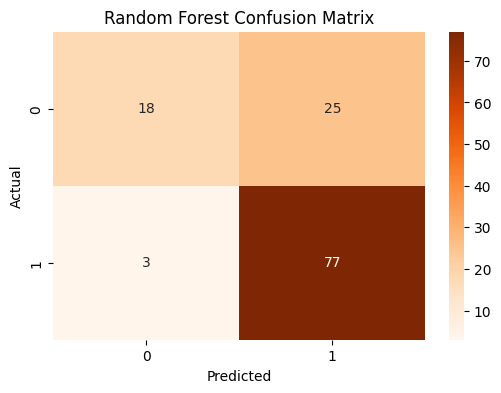

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

Step 7: **Feature importance**

<BarContainer object of 5 artists>

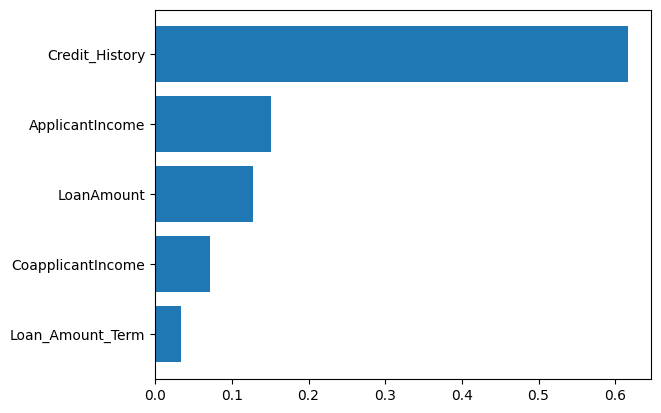

In [ ]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

Predicted Probability for each class

In [ ]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.29123151 0.70876849]
 [0.19075253 0.80924747]
 [0.36507682 0.63492318]
 [0.20622909 0.79377091]
 [0.12379125 0.87620875]
 [0.70282493 0.29717507]
 [0.22193171 0.77806829]
 [0.23191129 0.76808871]
 [0.95401515 0.04598485]
 [0.17502841 0.82497159]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


### **svm**

### **LOGISTIC REGRESSION**

In [ ]:
log_reg = LogisticRegression(max_iter=1000)  # max_iter may need to be adjusted
log_reg.fit(x_train, y_train)

# Predictions and evaluation for Logistic Regression
log_pred = log_reg.predict(x_test)
log_accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**CONFUSION MATRIX OF LOGISTIC REGRESSION**

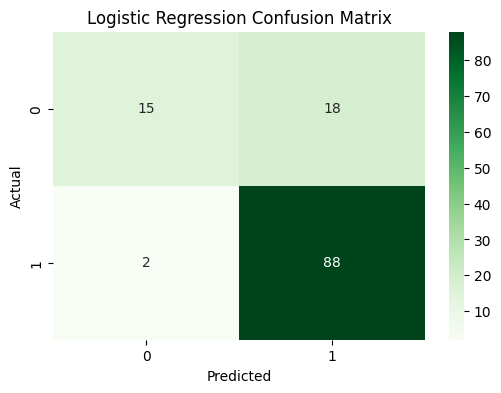

In [ ]:
log_cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(6,4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
log_prob = log_reg.predict_proba(x_test)
log_predict = log_reg.predict(x_test)
print("Logistic Regression Predicted Probabilities:")
print(log_prob[0:10])
print(log_predict)

Logistic Regression Predicted Probabilities:
[[0.20044872 0.79955128]
 [0.21165289 0.78834711]
 [0.28532238 0.71467762]
 [0.23256654 0.76743346]
 [0.22256782 0.77743218]
 [0.87986444 0.12013556]
 [0.17361674 0.82638326]
 [0.24543724 0.75456276]
 [0.88091655 0.11908345]
 [0.24812369 0.75187631]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


**SVM USING POLY**

SVM Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



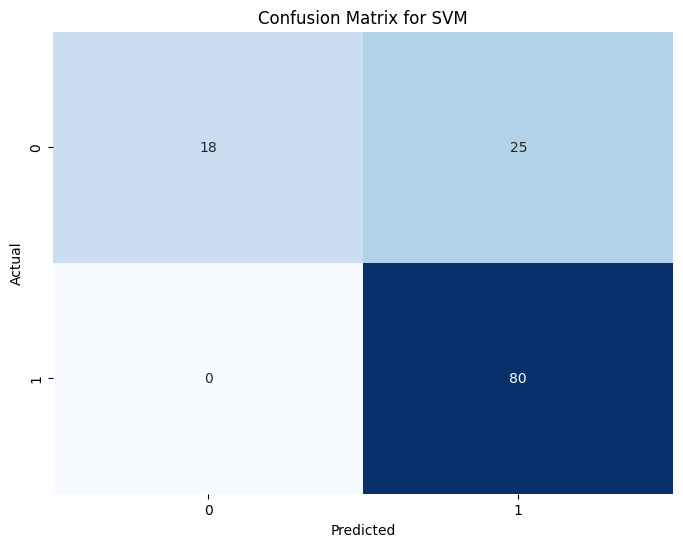

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, y_test already defined

# Step 1: Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 2: Train the SVM model

svm_model = SVC(kernel='poly', probability=True)

svm_model.fit(x_train_scaled, y_train)

# Step 3: Predict and evaluate the model
svm_pred = svm_model.predict(x_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print accuracy and classification report
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_pred))

# Step 4: Confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


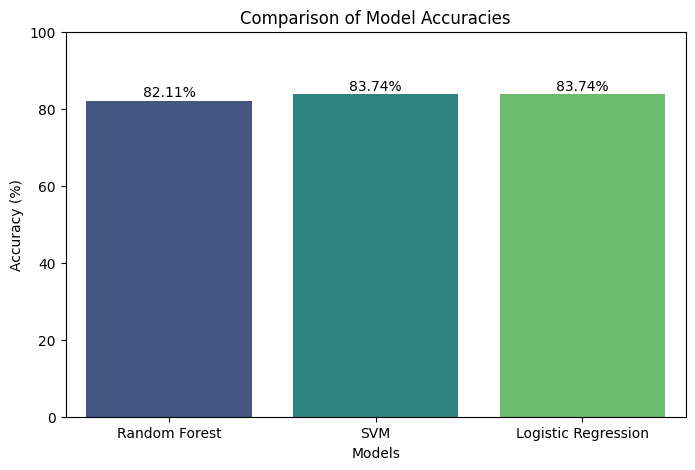

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracies calculated earlier
rf_accuracy = 82.11382113821138  # Random Forest accuracy
svm_accuracy = 83.73983739837398  # SVM accuracy
log_reg_accuracy =83.73983739837398 # Logistic Regression accuracy

# Create a list of accuracies and model names
accuracies = [rf_accuracy, svm_accuracy, log_reg_accuracy]
models = ['Random Forest', 'SVM', 'Logistic Regression']

# Create a bar plot for accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.ylim(0, 100)

# Add accuracy text labels above bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center')

# Show the plot
plt.show()
